In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [5]:
# Load the 'credit card' data

credit_card= pd.read_csv(r"C:\Users\lanka\Downloads\UCI_Credit_Card.csv.zip", header=0)

# Copy the file to back-up
credit_card_bk = credit_card.copy()


# Display first 5 rows in the dataset

print(credit_card.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0   

In [6]:
print(credit_card.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
credit_card.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
credit_card['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [16]:
# Displaying Duplicate values with in dataset

credit_card_dup = credit_card[credit_card.duplicated(keep='last')]
credit_card_dup

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [17]:
credit_card.rename({'default.payment.next.month':'default_payment'},axis=1,inplace=True)

In [18]:
credit_card


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [19]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

credit_card_count = credit_card.default_payment.value_counts()
print('Class 0:', credit_card_count[0])
print('Class 1:', credit_card_count[1])
print('Proportion:', round(credit_card_count[0] / credit_card_count[1], 2), ': 1')
print('Total CC Trans:', len(credit_card))

Class 0: 23364
Class 1: 6636
Proportion: 3.52 : 1
Total CC Trans: 30000


In [20]:
del credit_card['ID']

In [21]:
credit_card

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [22]:
for i in credit_card.columns:
    print(credit_card[i].value_counts())
    print("----------------------------------------------------------")

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1567
200000.0     1528
             ... 
730000.0        2
1000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64
----------------------------------------------------------
2    18112
1    11888
Name: SEX, dtype: int64
----------------------------------------------------------
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
----------------------------------------------------------
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
----------------------------------------------------------
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
4

In [36]:
cols=['LIMIT_BAL','EDUCATION','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [24]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in credit_card.columns:
    if col != 'default_payment':
        IndepVar.append(col)

TargetVar = 'default_payment'

x = credit_card[IndepVar]
y = credit_card[TargetVar]

In [29]:
x


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [30]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment, Length: 30000, dtype: int64

In [31]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21000, 23), (9000, 23), (21000,), (9000,))

In [32]:
x_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,240000.0,2,1,1,40,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27622,50000.0,2,1,2,23,-1,-1,-1,-1,-1,-1,3430.0,2478.0,2299.0,4800.0,9810.0,660.0,2548.0,2321.0,4800.0,9810.0,660.0,2980.0
28376,50000.0,2,2,1,36,2,2,2,2,0,0,46203.0,45159.0,49125.0,47956.0,43578.0,35126.0,0.0,4700.0,0.0,2004.0,3500.0,0.0
10917,200000.0,2,3,1,54,6,5,4,3,2,2,110185.0,107665.0,104686.0,102549.0,101400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27234,240000.0,1,1,1,35,-1,-1,-1,0,-1,-1,2024.0,2007.0,21790.0,17102.0,13367.0,22659.0,2017.0,21817.0,1120.0,13434.0,22772.0,22820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,50000.0,1,2,2,32,0,0,0,0,0,0,52475.0,53600.0,55739.0,55957.0,29238.0,6119.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0
5390,200000.0,1,1,2,37,2,2,2,2,2,2,157131.0,166590.0,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0
860,50000.0,1,1,2,26,-2,-2,-2,-2,-2,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,70000.0,2,2,2,25,0,0,0,0,2,2,73939.0,70488.0,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0


In [33]:
y_train

28465    1
27622    0
28376    0
10917    0
27234    0
        ..
29802    0
5390     1
860      0
15795    1
23654    1
Name: default_payment, Length: 21000, dtype: int64

In [37]:
# Scaling the features by using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [38]:
# Load the Results dataset

Results= pd.read_csv(r"C:\Users\lanka\Downloads\HTResults(2).csv", header=0)

Results.head()

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[ 562 1398]
 [ 299 6741]]
Outcome values : 
 562 1398 299 6741
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.29      0.40      1960
           0       0.83      0.96      0.89      7040

    accuracy                           0.81      9000
   macro avg       0.74      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000

Accuracy : 81.1 %
Precision : 65.3 %
Recall : 28.7 %
F1 Score : 0.398
Specificity or True Negative Rate : 95.8 %
Balanced Accuracy : 62.2 %
MCC : 0.343
roc_auc_score: 0.622


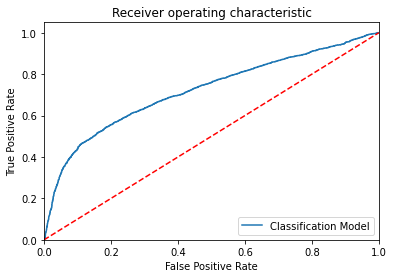

------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 766 1194]
 [2704 4336]]
Outcome values : 
 766 1194 2704 4336
Classification report : 
               precision    recall  f1-score   support

           1       0.22      0.39      0.28      1960
           0       0.78      0.62      0.69      7040

    accuracy                           0.57      9000
   macro avg       0.50      0.50      0.49      9000
weighted avg       0.66      0.57      0.60      9000

Accuracy : 56.7 %
Precision : 22.1 %
Recall : 39.1 %
F1 Score : 0.282
Specificity or True Negative Rate : 61.6 %
Balanced Accuracy : 50.4 %
MCC : 0.006
roc_auc_score: 0.503


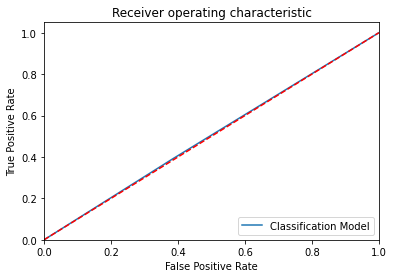

------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 450 1510]
 [ 276 6764]]
Outcome values : 
 450 1510 276 6764
Classification report : 
               precision    recall  f1-score   support

           1       0.62      0.23      0.34      1960
           0       0.82      0.96      0.88      7040

    accuracy                           0.80      9000
   macro avg       0.72      0.60      0.61      9000
weighted avg       0.77      0.80      0.76      9000

Accuracy : 80.2 %
Precision : 62.0 %
Recall : 23.0 %
F1 Score : 0.335
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 59.6 %
MCC : 0.289
roc_auc_score: 0.595


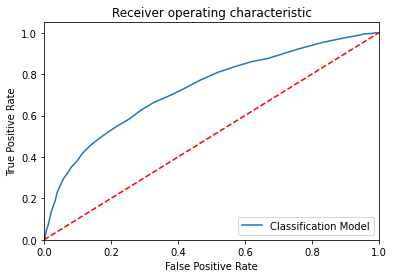

------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 578 1382]
 [ 318 6722]]
Outcome values : 
 578 1382 318 6722
Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.29      0.40      1960
           0       0.83      0.95      0.89      7040

    accuracy                           0.81      9000
   macro avg       0.74      0.62      0.65      9000
weighted avg       0.79      0.81      0.78      9000

Accuracy : 81.1 %
Precision : 64.5 %
Recall : 29.5 %
F1 Score : 0.405
Specificity or True Negative Rate : 95.5 %
Balanced Accuracy : 62.5 %
MCC : 0.344
roc_auc_score: 0.625


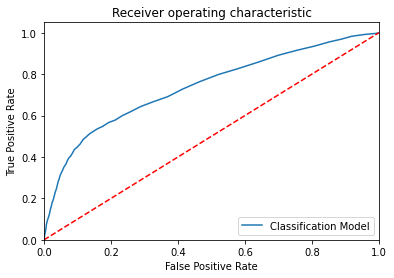

------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 625 1335]
 [ 516 6524]]
Outcome values : 
 625 1335 516 6524
Classification report : 
               precision    recall  f1-score   support

           1       0.55      0.32      0.40      1960
           0       0.83      0.93      0.88      7040

    accuracy                           0.79      9000
   macro avg       0.69      0.62      0.64      9000
weighted avg       0.77      0.79      0.77      9000

Accuracy : 79.4 %
Precision : 54.8 %
Recall : 31.9 %
F1 Score : 0.403
Specificity or True Negative Rate : 92.7 %
Balanced Accuracy : 62.3 %
MCC : 0.305
roc_auc_score: 0.623


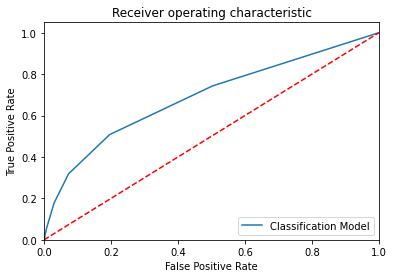

------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[ 568 1392]
 [ 324 6716]]
Outcome values : 
 568 1392 324 6716
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.29      0.40      1960
           0       0.83      0.95      0.89      7040

    accuracy                           0.81      9000
   macro avg       0.73      0.62      0.64      9000
weighted avg       0.79      0.81      0.78      9000

Accuracy : 80.9 %
Precision : 63.7 %
Recall : 29.0 %
F1 Score : 0.398
Specificity or True Negative Rate : 95.4 %
Balanced Accuracy : 62.2 %
MCC : 0.337
roc_auc_score: 0.622


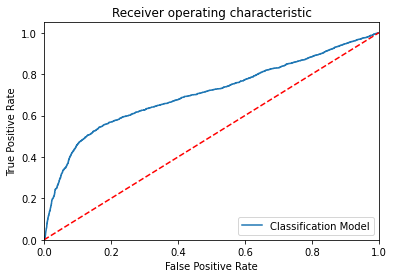

------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[ 441 1519]
 [ 937 6103]]
Outcome values : 
 441 1519 937 6103
Classification report : 
               precision    recall  f1-score   support

           1       0.32      0.23      0.26      1960
           0       0.80      0.87      0.83      7040

    accuracy                           0.73      9000
   macro avg       0.56      0.55      0.55      9000
weighted avg       0.70      0.73      0.71      9000

Accuracy : 72.7 %
Precision : 32.0 %
Recall : 22.5 %
F1 Score : 0.264
Specificity or True Negative Rate : 86.7 %
Balanced Accuracy : 54.6 %
MCC : 0.105
roc_auc_score: 0.546


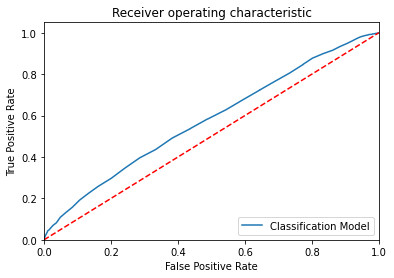

------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[ 791 1169]
 [1205 5835]]
Outcome values : 
 791 1169 1205 5835
Classification report : 
               precision    recall  f1-score   support

           1       0.40      0.40      0.40      1960
           0       0.83      0.83      0.83      7040

    accuracy                           0.74      9000
   macro avg       0.61      0.62      0.62      9000
weighted avg       0.74      0.74      0.74      9000

Accuracy : 73.6 %
Precision : 39.6 %
Recall : 40.4 %
F1 Score : 0.4
Specificity or True Negative Rate : 82.9 %
Balanced Accuracy : 61.6 %
MCC : 0.231
roc_auc_score: 0.616


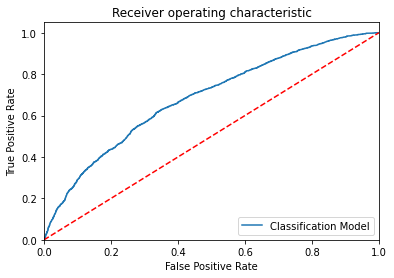

------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[ 421 1539]
 [ 264 6776]]
Outcome values : 
 421 1539 264 6776
Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.21      0.32      1960
           0       0.81      0.96      0.88      7040

    accuracy                           0.80      9000
   macro avg       0.71      0.59      0.60      9000
weighted avg       0.77      0.80      0.76      9000

Accuracy : 80.0 %
Precision : 61.5 %
Recall : 21.5 %
F1 Score : 0.318
Specificity or True Negative Rate : 96.2 %
Balanced Accuracy : 58.8 %
MCC : 0.276
roc_auc_score: 0.589


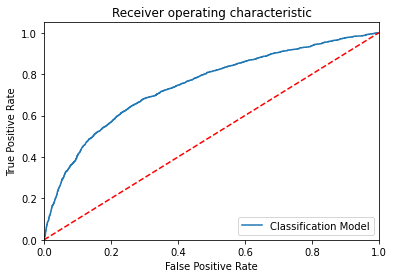

------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 997  963]
 [1099 5941]]
Outcome values : 
 997 963 1099 5941
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.51      0.49      1960
           0       0.86      0.84      0.85      7040

    accuracy                           0.77      9000
   macro avg       0.67      0.68      0.67      9000
weighted avg       0.78      0.77      0.77      9000

Accuracy : 77.1 %
Precision : 47.6 %
Recall : 50.9 %
F1 Score : 0.492
Specificity or True Negative Rate : 84.4 %
Balanced Accuracy : 67.6 %
MCC : 0.344
roc_auc_score: 0.676


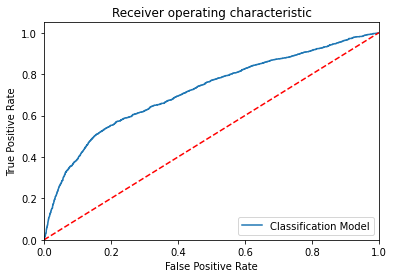

------------------------------------------------------------------------------------------------


In [39]:
# Build the Calssification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
# Create objects of classification algorithm with default hyper-parameters
ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)
modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
 bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
 n_jobs=None, random_state=None, verbose=0)
ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()
# Evalution matrix for all the algorithms
MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG,
ModelGB, ModelLGB, ModelGNB]
for models in MM:
 
 # Fit the model
 
    models.fit(x_train, y_train)
   
 # Prediction
 
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
 
 # Print the model name
 
    print('Model Name: ', models)
 
 # confusion matrix in sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
 # actual values
    actual = y_test
 # predicted values
    predicted = y_pred
 # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
 # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
 # classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n', C_Report)
 # calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
 
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
 # Matthews Correlation Coefficient (MCC). Range of values of MCC liebetween -1 to +1. 
 # A model with a score of +1 is a perfect model and -1 is a poor model
    from math import sqrt
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2
     ), '%' )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
 # Area under ROC curve 
    from sklearn.metrics import roc_curve, roc_auc_score
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
 
 # ROC Curve
 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
 # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('------------------------------------------------------------------------------------------------')
 #-------------------------------------------------------------------
    new_row = {'Model Name' : models,
   'True Positive' : tp,
   'False Negative' : fn,
   'False Positive' : fp,
   'True Negative' : tn,
   'Accuracy' : accuracy,
   'Precision' : precision,
   'Recall' : sensitivity,
   'F1 Score' : f1Score,
   'Specificity' : specificity,
   'MCC':MCC,
   'ROC_AUC_Score':roc_auc_score(actual, predicted),
   'Balanced Accuracy':balanced_accuracy}
    Results =Results.append(new_row, ignore_index=True)

In [40]:
Results

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),562,1398,299,6741,0.811,0.653,0.287,0.398,0.958,0.343,0.622132,0.622
1,DecisionTreeClassifier(),766,1194,2704,4336,0.567,0.221,0.391,0.282,0.616,0.006,0.503363,0.504
2,"(DecisionTreeClassifier(max_features='sqrt', r...",450,1510,276,6764,0.802,0.620,0.230,0.335,0.961,0.289,0.595194,0.596
3,"(ExtraTreeClassifier(random_state=1829055338),...",578,1382,318,6722,0.811,0.645,0.295,0.405,0.955,0.344,0.624864,0.625
4,KNeighborsClassifier(),625,1335,516,6524,0.794,0.548,0.319,0.403,0.927,0.305,0.622791,0.623
5,SVC(probability=True),568,1392,324,6716,0.809,0.637,0.290,0.398,0.954,0.337,0.621887,0.622
6,(DecisionTreeClassifier(random_state=290020991...,441,1519,937,6103,0.727,0.320,0.225,0.264,0.867,0.105,0.545952,0.546
7,([DecisionTreeRegressor(criterion='friedman_ms...,791,1169,1205,5835,0.736,0.396,0.404,0.400,0.829,0.231,0.616203,0.616
8,LGBMClassifier(),421,1539,264,6776,0.800,0.615,0.215,0.318,0.962,0.276,0.588648,0.588
9,GaussianNB(),997,963,1099,5941,0.771,0.476,0.509,0.492,0.844,0.344,0.676283,0.676


In [41]:
 # Hyperparametr tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# splitter in Decision Tree
# Number of features to consider at every split

max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

# Minimum number of samples required to split a node

min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1, 2, 4,6,8]

# Create the random grid

Random_Grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

print(Random_Grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [42]:
from sklearn.ensemble import ExtraTreesClassifier
ModelET = ExtraTreesClassifier()
ModelET_RandomCV=RandomizedSearchCV(estimator=ModelET, param_distributions=Random_Grid, n_iter=100, cv=3,
                                    verbose=2, random_state=100,n_jobs=-1)
### fit the randomized model

ModelET_RandomCV.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [43]:

ModelET_RandomCV.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 1000,
 'criterion': 'gini'}

Confusion matrix : 
 [[ 623 1337]
 [ 344 6696]]
Outcome values : 
 623 1337 344 6696
Classification report : 
               precision    recall  f1-score   support

           1       0.64      0.32      0.43      1960
           0       0.83      0.95      0.89      7040

    accuracy                           0.81      9000
   macro avg       0.74      0.63      0.66      9000
weighted avg       0.79      0.81      0.79      9000

Accuracy : 81.3 %
Precision : 64.4 %
Recall : 31.8 %
F1 Score : 0.426
Specificity or True Negative Rate : 95.1 %
Balanced Accuracy : 63.4 %
MCC : 0.359
roc_auc_score: 0.634


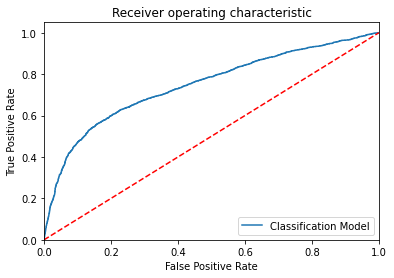

-----------------------------------------------------------------------------------------------------


In [44]:
from sklearn.ensemble import ExtraTreesClassifier
ModelET = ExtraTreesClassifier( criterion='gini', max_depth=1000, min_samples_split=14, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='log2', random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
ModelET.fit(x_train,y_train)


# Predict the model with test data set

y_pred = ModelET.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
Results = Results.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [45]:
Results

,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),562,1398,299,6741,0.811,0.653,0.287,0.398,0.958,0.343,0.622132,0.622
1,DecisionTreeClassifier(),766,1194,2704,4336,0.567,0.221,0.391,0.282,0.616,0.006,0.503363,0.504
2,"(DecisionTreeClassifier(max_features='sqrt', r...",450,1510,276,6764,0.802,0.620,0.230,0.335,0.961,0.289,0.595194,0.596
3,"(ExtraTreeClassifier(random_state=1829055338),...",578,1382,318,6722,0.811,0.645,0.295,0.405,0.955,0.344,0.624864,0.625
4,KNeighborsClassifier(),625,1335,516,6524,0.794,0.548,0.319,0.403,0.927,0.305,0.622791,0.623
5,SVC(probability=True),568,1392,324,6716,0.809,0.637,0.290,0.398,0.954,0.337,0.621887,0.622
6,(DecisionTreeClassifier(random_state=290020991...,441,1519,937,6103,0.727,0.320,0.225,0.264,0.867,0.105,0.545952,0.546
7,([DecisionTreeRegressor(criterion='friedman_ms...,791,1169,1205,5835,0.736,0.396,0.404,0.400,0.829,0.231,0.616203,0.616
8,LGBMClassifier(),421,1539,264,6776,0.800,0.615,0.215,0.318,0.962,0.276,0.588648,0.588
9,GaussianNB(),997,963,1099,5941,0.771,0.476,0.509,0.492,0.844,0.344,0.676283,0.676


In [46]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

Grid_Params = {'max_depth': [2, 3, 5, 10, 20],
               'min_samples_leaf': [5, 10, 20, 50, 100],
               'criterion': ["gini", "entropy"]
               }

ModelET = ExtraTreesClassifier(random_state=42)

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator=ModelET, param_grid=Grid_Params, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=ExtraTreesClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             verbose=2)

In [47]:
# Best parameter from gridseachCV

Grid_search.best_params_


{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

Confusion matrix : 
 [[ 485 1475]
 [ 238 6802]]
Outcome values : 
 485 1475 238 6802
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.25      0.36      1960
           0       0.82      0.97      0.89      7040

    accuracy                           0.81      9000
   macro avg       0.75      0.61      0.62      9000
weighted avg       0.79      0.81      0.77      9000

Accuracy : 81.0 %
Precision : 67.1 %
Recall : 24.7 %
F1 Score : 0.362
Specificity or True Negative Rate : 96.6 %
Balanced Accuracy : 60.6 %
MCC : 0.324
roc_auc_score: 0.607


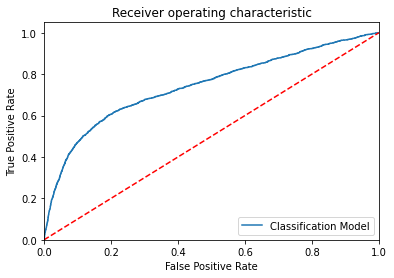

-----------------------------------------------------------------------------------------------------


In [48]:
from sklearn.ensemble import ExtraTreesClassifier
ModelET = ExtraTreesClassifier( criterion='entropy', max_depth=20, min_samples_split=5, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features='sqrt', random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
ModelET.fit(x_train,y_train)




# Predict the model with test data set

y_pred = ModelET.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelET.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelET,
           'True Positive': tp,
           'False Negative': fn, 
           'False Positive': fp, 
           'True Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
Results = Results.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [49]:
Results


,Model Name,True Positive,False Negative,False Positive,True Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),562,1398,299,6741,0.811,0.653,0.287,0.398,0.958,0.343,0.622132,0.622
1,DecisionTreeClassifier(),766,1194,2704,4336,0.567,0.221,0.391,0.282,0.616,0.006,0.503363,0.504
2,"(DecisionTreeClassifier(max_features='sqrt', r...",450,1510,276,6764,0.802,0.620,0.230,0.335,0.961,0.289,0.595194,0.596
3,"(ExtraTreeClassifier(random_state=1829055338),...",578,1382,318,6722,0.811,0.645,0.295,0.405,0.955,0.344,0.624864,0.625
4,KNeighborsClassifier(),625,1335,516,6524,0.794,0.548,0.319,0.403,0.927,0.305,0.622791,0.623
5,SVC(probability=True),568,1392,324,6716,0.809,0.637,0.290,0.398,0.954,0.337,0.621887,0.622
6,(DecisionTreeClassifier(random_state=290020991...,441,1519,937,6103,0.727,0.320,0.225,0.264,0.867,0.105,0.545952,0.546
7,([DecisionTreeRegressor(criterion='friedman_ms...,791,1169,1205,5835,0.736,0.396,0.404,0.400,0.829,0.231,0.616203,0.616
8,LGBMClassifier(),421,1539,264,6776,0.800,0.615,0.215,0.318,0.962,0.276,0.588648,0.588
9,GaussianNB(),997,963,1099,5941,0.771,0.476,0.509,0.492,0.844,0.344,0.676283,0.676


In [ ]:
#the best model to fit the data is extra tree classifier by hypertuing using randomised search